### **Importações**

In [88]:
import pandas as pd
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [89]:
nomes_colunas  = ['P0','P1','P2','P3','P4','P5','P6','P7','P8','Results']
nomes_colunas

['P0', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'Results']

In [90]:
#Importação do dataset de treino
file_path = r'Treino.csv'
df_treino = pd.read_csv(file_path,sep=';',names=nomes_colunas)
print(df_treino.shape)
display(df_treino.head())

(1264, 10)


,P0,P1,P2,P3,P4,P5,P6,P7,P8,Results
0,Results,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,2.0
2,1,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,2.0
3,1,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,2.0
4,1,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,2.0


In [91]:
# Importação dos dataset de validacao e teste
file_path = r'Validacao.csv'
df_validacao = pd.read_csv(file_path,sep=';',names=nomes_colunas)
df_validacao = df_validacao.iloc[1:]
df_validacao = df_validacao.astype(int)
display(df_validacao.head())

file_path = r'Teste.csv'
df_teste = pd.read_csv(file_path,sep=';',names=nomes_colunas)
df_teste = df_teste.iloc[1:]
df_teste = df_teste.astype(int)
display(df_teste.head())

,P0,P1,P2,P3,P4,P5,P6,P7,P8,Results
1,-1,1,-1,1,1,-1,-1,-1,1,2
2,1,1,-1,-1,-1,1,1,-1,-1,2
3,1,-1,1,1,-1,-1,-1,1,1,2
4,-1,1,1,1,-1,-1,-1,1,1,2
5,1,-1,1,-1,-1,1,-1,1,-1,2


,P0,P1,P2,P3,P4,P5,P6,P7,P8,Results
1,-1,1,-1,-1,1,1,1,-1,1,2
2,1,-1,1,-1,1,1,-1,1,-1,2
3,-1,1,-1,1,1,-1,1,-1,1,2
4,-1,1,-1,-1,-1,1,1,-1,1,2
5,-1,-1,1,1,1,-1,-1,-1,1,2


### **Os datasets precisam estar neste padrão ao serem carregados em qualquer algoritmo**

In [92]:
# Os datasets precisam estar neste padrão ao serem carregados em qualquer algoritmo
df_treino = df_treino.iloc[1:]
df_treino = df_treino.astype(int)
df_treino

,P0,P1,P2,P3,P4,P5,P6,P7,P8,Results
1,1,1,-1,-1,1,1,1,-1,-1,2
2,1,1,-1,-1,-1,1,1,1,-1,2
3,1,1,-1,-1,-1,1,1,-1,1,2
4,1,1,-1,-1,-1,1,1,-1,-1,2
5,1,-1,1,1,1,-1,-1,1,-1,2
...,...,...,...,...,...,...,...,...,...,...
1259,-1,-1,1,-1,0,1,0,1,1,1
1260,0,1,-1,0,1,1,-1,1,-1,1
1261,1,-1,-1,-1,-1,1,1,1,1,1
1262,0,0,-1,1,1,1,1,-1,-1,1


#### **Treino**

In [93]:
# Filtrando as features que serão passadas para predição
X = df_treino.drop(columns=['Results'])
X

,P0,P1,P2,P3,P4,P5,P6,P7,P8
1,1,1,-1,-1,1,1,1,-1,-1
2,1,1,-1,-1,-1,1,1,1,-1
3,1,1,-1,-1,-1,1,1,-1,1
4,1,1,-1,-1,-1,1,1,-1,-1
5,1,-1,1,1,1,-1,-1,1,-1
...,...,...,...,...,...,...,...,...,...
1259,-1,-1,1,-1,0,1,0,1,1
1260,0,1,-1,0,1,1,-1,1,-1
1261,1,-1,-1,-1,-1,1,1,1,1
1262,0,0,-1,1,1,1,1,-1,-1


In [101]:
X.values[0].reshape(9,)

array([ 1,  1, -1, -1,  1,  1,  1, -1, -1])

In [9]:
# Obtendo as labels do dataset de treino
Y = df_treino.drop(columns=['P0','P1','P2','P3','P4','P5','P6','P7','P8'])['Results'].values
Y

array([2, 2, 2, ..., 1, 1, 1])

##### **Uso de heurística para determinar o K**

In [17]:
# Heurísitca para definir o K:  Regra da Raiz Quadrada
from math import sqrt,ceil

# Arrendondando a raiz quadrada do total de entradas do dataset de treino

k = ceil(sqrt(df_treino['P0'].count())) 
print("Quantidade vizinhos: {}".format(k))

# Criação do classificador
clf = neighbors.KNeighborsClassifier(n_neighbors=k)

# Treino do modelo
clf.fit(X.values, Y)

score = cross_val_score(clf, X.values, Y, cv=5, scoring=None)
print("K={}, Acurácia média: {}".format(k,score.mean()))

Quantidade vizinhos: 36
K=36, Acurácia média: 0.7070362005144615


In [20]:
# Lista para guardar os resultados dos testes para k
lista_k_accuracy = []

# Criação do classificador
for k in range(1,21):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)

    # Treino do modelo
    clf.fit(X.values, Y)

    score = cross_val_score(clf, X.values, Y, cv=5, scoring=None)
    print("K={}, Acurácia média: {}".format(k,score.mean()))
    lista_k_accuracy.append([k,score.mean()])

K=1, Acurácia média: 0.5993600602296254
K=2, Acurácia média: 0.5875054896794027
K=3, Acurácia média: 0.6801587301587302
K=4, Acurácia média: 0.7142041533345881
K=5, Acurácia média: 0.7648660518225735
K=6, Acurácia média: 0.8060104147060668
K=7, Acurácia média: 0.8305477131564087
K=8, Acurácia média: 0.8249984315201706
K=9, Acurácia média: 0.8463736746345443
K=10, Acurácia média: 0.8431959345002824
K=11, Acurácia média: 0.8424148315452664
K=12, Acurácia média: 0.8337129054520359
K=13, Acurácia média: 0.8321130560260995
K=14, Acurácia média: 0.8257826714348454
K=15, Acurácia média: 0.8139092791266703
K=16, Acurácia média: 0.8004329004329005
K=17, Acurácia média: 0.787772131250392
K=18, Acurácia média: 0.7735271974402409
K=19, Acurácia média: 0.769558943471987
K=20, Acurácia média: 0.7655938264633917


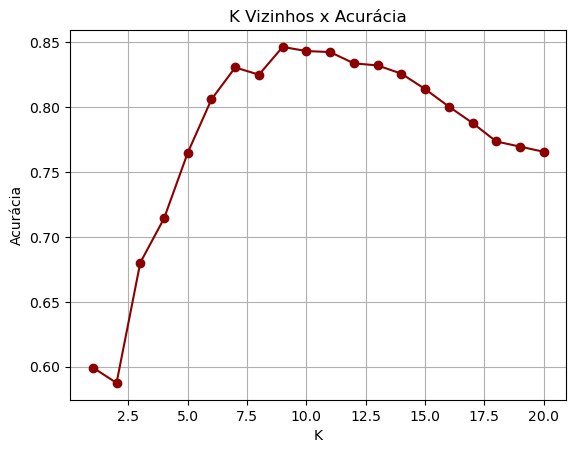

In [26]:
# Separando em listas separadas para o eixo x e y
x = [par[0] for par in lista_k_accuracy]
y = [par[1] for par in lista_k_accuracy]

# Plotar o gráfico de linha
plt.plot(x, y, marker='o',color='darkred') 

# Adicionar título e rótulos
plt.title('K Vizinhos x Acurácia')
plt.xlabel('K')
plt.ylabel('Acurácia')

# Mostrar o gráfico
plt.grid(True)
plt.show()


In [27]:
# K determinado a partir dos testes
k = 9  

# Criação do classificador
clf = neighbors.KNeighborsClassifier(n_neighbors=k)

# Treino do modelo
clf.fit(X.values, Y)

KNeighborsClassifier(n_neighbors=9)

#### **Validação**

In [32]:
# Filtrando as features que serão passadas para predição
X_valid = df_validacao.drop(columns=['Results'])
X_valid = X_valid.values
X_valid

array([[-1,  1, -1, ..., -1, -1,  1],
       [ 1,  1, -1, ...,  1, -1, -1],
       [ 1, -1,  1, ..., -1,  1,  1],
       ...,
       [-1, -1,  0, ...,  1, -1,  0],
       [ 1, -1, -1, ...,  1,  1,  0],
       [ 0,  1, -1, ...,  1,  1,  0]])

In [31]:
# Obtendo as labels do dataset de validação
Y_valid = df_validacao.drop(columns=['P0','P1','P2','P3','P4','P5','P6','P7','P8'])['Results'].values
Y_valid

array([ 2,  2,  2,  2,  2,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1])

In [34]:
# Criação das predições a partir da base de validação
predicao = clf.predict(X_valid)

# Calcular a acurácia
acuracia = accuracy_score(Y_valid, predicao)
print(f"Acurácia: {acuracia:.2f}")


Acurácia: 0.89


#### **Teste**

In [37]:
# Filtrando as features que serão passadas para predição
X_test = df_teste.drop(columns=['Results'])
X_test = X_test.values
X_test

array([[-1,  1, -1, ...,  1, -1,  1],
       [ 1, -1,  1, ..., -1,  1, -1],
       [-1,  1, -1, ...,  1, -1,  1],
       ...,
       [-1,  0,  0, ...,  1,  1,  1],
       [ 1, -1, -1, ...,  1,  1,  1],
       [ 1,  0,  1, ...,  1,  0, -1]])

In [38]:
# Obtendo as labels do dataset de teste
Y_test = df_teste.drop(columns=['P0','P1','P2','P3','P4','P5','P6','P7','P8'])['Results'].values
Y_test

array([ 2,  2,  2,  2,  2,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1])

In [39]:
# Criação das predições a partir da base de validação
predicao = clf.predict(X_test)

# Calcular a acurácia
acuracia = accuracy_score(Y_test, predicao)
print(f"Acurácia: {acuracia:.2f}")


Acurácia: 0.87


In [40]:
nomes_classes = ["O ganhou","Empate","X ganhou","Ainda tem jogo"]

In [44]:
# Calcular e imprimir o relatório de classificação
relatorio_classificacao = classification_report(Y_test, predicao, target_names=nomes_classes)
print("Relatório de Classificação:\n", relatorio_classificacao)

Relatório de Classificação:
                 precision    recall  f1-score   support

      O ganhou       0.91      0.97      0.94        40
        Empate       0.79      0.85      0.82        40
      X ganhou       0.97      0.90      0.94        40
Ainda tem jogo       0.33      0.17      0.22         6

      accuracy                           0.87       126
     macro avg       0.75      0.72      0.73       126
  weighted avg       0.86      0.87      0.87       126



### **Partida**

In [48]:
import numpy as np
import random

### **Função para plotagem do tabuleiro**

In [ ]:
def plot_board(board):
    fig, ax = plt.subplots()
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 3)

    plt.plot([1, 1], [0, 3], color='black', linewidth=2)
    plt.plot([2, 2], [0, 3], color='black', linewidth=2)
    plt.plot([0, 3], [1, 1], color='black', linewidth=2)
    plt.plot([0, 3], [2, 2], color='black', linewidth=2)

    for i in range(3):
        for j in range(3):
            mark = board[i][j]
            if mark == 1:
                plt.text(j + 0.5, 2.5 - i, 'X', fontsize=42, ha='center', va='center', color='black')
            elif mark == -1:
                plt.text(j + 0.5, 2.5 - i, 'O', fontsize=42, ha='center', va='center', color='black')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    plt.show()


##### **Funções para realização de jogadas**

In [45]:
# Função para coleta da jogada
def coleta_jogada():
    # Coletando os valores por meio de um input
    linha, coluna = input("Informe a linha e a coluna onde deseja incluir o x. Ex: [1,2]").split(",")
    
    # Convertendo os valores para inteiro
    return int(linha), int(coluna)

# Função para validação da posição informada para realização da jogada
def valida_jogada(jogada,linha,coluna):
    
    # Conversão da jogada em um array 3x3
    jogada = np.array(jogada).reshape(3,3)
    
    # Verificar se a posição especificada não é igual a zero
    if jogada[linha, coluna] != 0:
        return True
    
    return False
    

# Função para realização da jogada do computador a partir de uma função aleatória
def jogada_COM(jogada):
    jogada_feita = False
    
    while not jogada_feita: 
        # Escolha de um índice aleatório na lista
        indice_aleatorio = random.randint(0, len(jogada) - 1)

        # Caso a posição escolhida esteja livre realiza a modificação
        if jogada[indice_aleatorio] not in [1,-1]:
            #print("Lugar livre, Index: {} Valor: {}".format(indice_aleatorio,jogada[indice_aleatorio]))
            # Atrubuição realizada na posição aleatória escolhida
            jogada[indice_aleatorio] = -1 
            jogada_feita = True
        
    return jogada


def ajuste_jogada(jogada,linha,coluna):
    # Subtraindo os valores das linhas ou colunas caso o valor seja maior que zero
    if linha != 0:
        linha -= 1

    if coluna != 0:
        coluna -= 1
        
    # print("Linha: {} Coluna: {}".format(linha,coluna))
    # Chamada da função para validação da jogada:
        

    # Caso a posição informada pelo usuário não esteja preenchida, ele realiza a modificação
    if jogada[linha][coluna] != 0:
        print ("Já preenchido")
    else:
        jogada[linha][coluna] = 1
        print ("Jogada realizada")
        
    return jogada

In [47]:
jogada = [0,0,0,0,0,0,0,0,0]
jogada = np.array(jogada).reshape(3,3)

In [69]:


# jogada = [1,0,-1,0,1,0,-1,0,0]
# print("Tabuleiro antes da jogada: {}".format(jogada))

# # Escolher um índice aleatório na lista
# indice_aleatorio = random.randint(0, len(jogada) - 1)

# if jogada[indice_aleatorio] not in [1,-1]:
#     print("Lugar livre, Index: {} Valor: {}".format(indice_aleatorio,jogada[indice_aleatorio]))
#     jogada[indice_aleatorio] = -1
# else:
#     print("Lugar Indisponível, Index: {} Valor: {}".format(indice_aleatorio,jogada[indice_aleatorio]))
    
# print("Tabuleiro após a jogada: {}".format(jogada))


Tabuleiro antes da jogada: [1, 0, -1, 0, 1, 0, -1, 0, 0]
Lugar livre, Index: 3 Valor: 0
Tabuleiro após a jogada: [1, 0, -1, -1, 1, 0, -1, 0, 0]


In [72]:
# import random

# def jogada_COM(jogada):
#     jogada_feita = False
    
#     while not jogada_feita: 
#         # Escolher um índice aleatório na lista
#         indice_aleatorio = random.randint(0, len(jogada) - 1)

#         # Caso a posição escolhida esteja livre realiza a modificação
#         if jogada[indice_aleatorio] not in [1,-1]:
#             print("Lugar livre, Index: {} Valor: {}".format(indice_aleatorio,jogada[indice_aleatorio]))
#             jogada[indice_aleatorio] = -1 
#             jogada_feita = True
        
#     return jogada

In [99]:
# jogada = [1,0,-1,0,1,0,-1,0,0]
# jogada = np.array(jogada).reshape(3,3)
# print(jogada)

# jogada = np.array(jogada).reshape(9,)
# print(jogada)
# # print(jogada_COM(jogada))
# # Transformando novamente no formato de lista
# jogada = jogada.flatten().tolist()

[[ 1  0 -1]
 [ 0  1  0]
 [-1  0  0]]
[ 1  0 -1  0  1  0 -1  0  0]


#### **Realização da partida**

In [46]:
from IPython.display import clear_output


# Convertendo a lista de jogadas em um array 3x3
jogada = [0,0,0,0,0,0,0,0,0]
jogada = np.array(jogada).reshape(3,3)
plot_board(jogada)

finalizar_jogo = False

print("=====================================\n")

while not finalizar_jogo:
    # Plotando o tabuleiro 
    plot_board(jogada)
    
    # Limpando o prompt
    clear_output(wait=True)
    
    # Coletando a jogada
    linha,coluna = coleta_jogada()
    
    # Chamando a função de validação de jogada
    if valida_jogada(jogada,linha,coluna):
        # Realizando o ajuste da jogada a partir das posições de inserção informadas
        jogada = ajuste_jogada(jogada,linha,coluna)
        print('Jogada realizada!')
    else:
        print("Jogada não realizada")
        continue # recomeça solicitando a jogada para o usuário
    
    # Plotando o tabuleiro 
    plot_board(jogada)
    
    # PROBLEMA NO CÓDIGO, TEM QUE CONVERTER EM UMA LISTA PARA PASSAR PARA 
    # Obtenção do status do jogo
    jogada = jogada.reshape(9,)
    predicao = clf.predict(jogada)
    print("Situação jogo: {}".format(predicao))
    print("=====================================\n")
    
    
    jogada = jogada_COM(jogada)
    jogada = jogada.reshape(9,)
    predicao = clf.predict(jogada)
    print("Situação jogo: {}".format(predicao))
    print("=====================================\n")
    
    # Caso haja um vencedor o loop será encerrado
    if predicao != "AINDA TEM JOGO":
        finalizar_jogo = True

NameError: name 'plot_board' is not defined